Anime Recomendation Datasbase 2020


***Descripión***:

El siguiente dataset (extraído de Kaggle.com) contiene información sobre 17.562 ***animes*** y las preferencias de 325.772 usuraios diferentes. Estos datos fueron recopilados de '*myanimelist.net*', entre el 26 de Febrero 2020 y el 20 de Marzo del mismo año.  
  

El conjunto de datos se integra de un archivo zip, integrados por varios datasets, en general, la información de los mismos está compuesta por:
- Una lista de animes por cada usuario. La misma inlcuye aquellos que se comenzaron a ver y fueron abandonados, los completados (finalizados), los planeados para ver, los que están mirando actualmente, y los que están en pausa;
- Calificaciones (que van del 1 al 10) dadas por los usuarios a los animés que han visto completamente;
- Información de cada uno de los animés, como: nombre (en inglés y en japonés), fecha en la que fue transmitido, género, tipo, episodios, productores, duración, entre otros.



***Objetivo***: Analizar el conjunto de datos, para crear un sistema de recomendación que genere sugerencias de animés personalizadas para todos los usuarios, inlcuyendo aquellos que no tienen ningún historial de visualizaciones en el conjuntos de entrenamiento.



**DATOS**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#from google.colab import files
#uploaded = files.upload()


Saving rating_complete.csv to rating_complete.csv


In [ ]:
#df = pd.read_csv('rating_complete.csv')

In [ ]:
df = pd.read_csv(r"\Users\grodriguez\Desktop\Lupe\1.Data Science\Trabajo Grupo\TP_4\Dataset\rating_complete.csv")

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving anime.csv to anime (1).csv


In [ ]:
#anime = pd.read_csv('anime.csv')

In [ ]:
anime = pd.read_csv(r"\Users\grodriguez\Desktop\Lupe\1.Data Science\Trabajo Grupo\TP_4\Dataset\anime.csv")

In [ ]:
anime_synopsis = pd.read_csv(r"\Users\grodriguez\Desktop\Lupe\1.Data Science\Trabajo Grupo\TP_4\Dataset\anime_with_synopsis.csv")

**RATING_COMPLETE (DF)**

Este dataset contiene un subconjunto de 'animelist.csv'. Este conjunto de datos solo considera animes que el usuario ha visto completamente watching_status) y les ha dado una puntuación (score). Este dataset contiene 57 millones de valoraciones aplicadas a 16.872 animes por 310.059 usuarios. A continuación, se detalla el diccionario de variables de esta tabla:

- user_id: código de identificación de cada usuario, generado aleatoriamente y no identificable
- anime_id: código de identificación (ID) de MyAnimeList del animé al que el usuario ha idenficiado
- rating: calificación que el usuario ha asignado (del 1 al 10).   

In [ ]:
df.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


**ANIME**

Este dataset contiene un información general de cada animé, como género, estadísticas, estudio, etc. A continuación, se detalla el diccionario de variables de esta tabla:

- MAL_ID: código de identificación (ID) de MyAnimeList del anime
- Name: nombre completo del anime
- Score: puntuación promedio del anime dada por todos los usuarios en la base de datos de MyAnimeList
- Genres: listado de géneros para cada anime, por ejemplo: Acción, Aventura, Comedia, Drama, Ciencia ficción, Espacio
- English name: nombre completo en inglés del anime
- Japanese name: nombre completo en japonés del anime
- Type: TV, película, OVA, etc.
- Episodes: número de capítulos
- Aired: fecha de emisión
- Premiered: fecha de estreno de temporada
- Producers: lista de productores, por ejemplo: Bandai Visual
- Licensors: lista  de licenciatarios, por ejemplo: Funimation, Bandai Entertainment
- Studios: lista separada de estudios televisivos, por ejemplo: Sunrise
- Sourse: Manga, Novela ligera, Libro, etc.
- Duration: tiempo de duración del anime por episodio
- Rating: clasificación por edad
- Ranked: posición basada en la puntuación, ranking.
- Popularity: posición basada en el número de usuarios que han agregado el anime a su lista. Popularidad
- Members: número de miembro de la comunidad que están en el "grupo" de este anime. Community member del animé
- Favorites: número de usuarios que tienen el anime como "favorito"
- Watching: número de usuarios que están viendo el anime
- Completed: número de usuarios que han completado el anime
- On-Hold: número de usuarios que tienen el anime en pausa
- Dropped: número de usuarios que han abandonado el anime
- Plan to Watch: número de usuarios que planean ver el anime
- Score-10: número de usuarios que al calificaron al animé con 10
- Score-9: número de usuarios que calificaron al animé con 9
- Score-8: número de usuarios que calificaron al animé con 8
- Score-7: número de usuarios que calificaron al animé con 7
- Score-6: número de usuarios que calificaron al animé con 6
- Score-5: número de usuarios que calificaron al animé con 5
- Score-4: número de usuarios que calificaron al animé con 4
- Score-3: número de usuarios que calificaron al animé con 3
- Score-2: número de usuarios que calificaron al animé con 2
- Score-1: número de usuarios que calificaron al animé con 1

In [ ]:
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


**ANIME_SYNOPSIS**

Detallamos, a continuación, el diccionario de variables de esta tabla:
- MAL_ID: código de identificación (ID) de MyAnimeList del anime
- Name: nombre completo del anime
- Score: puntuación promedio del anime dada por todos los usuarios en la base de datos de MyAnimeList
- Genres: listado de géneros para cada anime, por ejemplo: Acción, Aventura, Comedia, Drama, Ciencia ficción, Espacio
- synopsis: resúmen breve del animé

In [ ]:
anime_synopsis.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


**Análisis Exloratorio de Datos**

In [ ]:
anime.shape

(17562, 35)

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

Convertimos las columnas numéricas tipo 'Int' y 'Obj', a columnas tipo 'Float'

In [ ]:
numeric_columns = ["Score", "Ranked", "Popularity", "Members", "Favorites", "Watching",
    "Completed", "On-Hold", "Dropped", "Plan to Watch", "Score-10", "Score-9", "Score-8",
                   "Score-7", "Score-6", "Score-5", "Score-4", "Score-3", "Score-2",
                   "Score-1"]
object_columns = 'MAL_ID'

In [ ]:
for columna in numeric_columns:
    anime[columna] = pd.to_numeric(anime[columna], errors='coerce')
    anime[columna] = anime[columna].astype(float)

anime[object_columns] = anime[object_columns].astype(object)

In [ ]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MAL_ID         17562 non-null  object 
 1   Name           17562 non-null  object 
 2   Score          12421 non-null  float64
 3   Genres         17562 non-null  object 
 4   English name   17562 non-null  object 
 5   Japanese name  17562 non-null  object 
 6   Type           17562 non-null  object 
 7   Episodes       17562 non-null  object 
 8   Aired          17562 non-null  object 
 9   Premiered      17562 non-null  object 
 10  Producers      17562 non-null  object 
 11  Licensors      17562 non-null  object 
 12  Studios        17562 non-null  object 
 13  Source         17562 non-null  object 
 14  Duration       17562 non-null  object 
 15  Rating         17562 non-null  object 
 16  Ranked         15800 non-null  float64
 17  Popularity     17562 non-null  float64
 18  Member

In [ ]:
nulos = pd.DataFrame(anime.isna().sum())
nulos.columns = ['nulos']
nulos['nulos_porcentaje'] = nulos['nulos'] / anime.shape[0]
nulos[nulos.nulos > 0].sort_values('nulos', ascending = False)

,nulos,nulos_porcentaje
Score,5141,0.292734
Score-9,3167,0.180333
Ranked,1762,0.100330
Score-2,1597,0.090935
Score-8,1371,0.078066
Score-3,1307,0.074422
Score-4,977,0.055631
Score-5,584,0.033254
Score-6,511,0.029097
Score-7,503,0.028641


Cantidad de animés en el dataset (anime_id)

In [ ]:
anime.MAL_ID.nunique()

17562

In [ ]:
#Análisis de Score, Rating, Ranked, Favorites, Watching, Completed, On-Hold, Dropped, Plan to Watch.

Top 20 de animés con más viauslizaciones (en estado "completado")

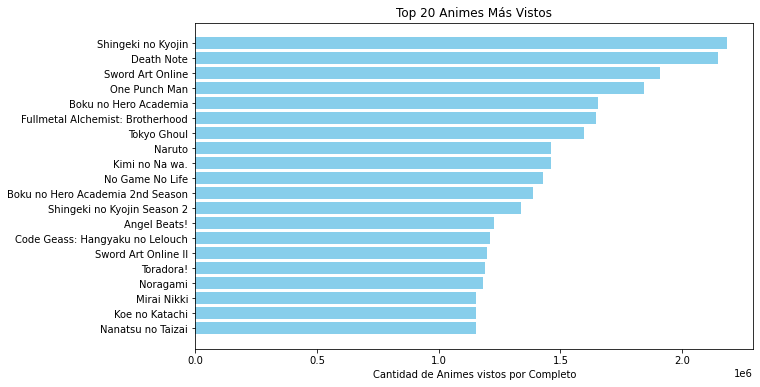

In [ ]:
top_20_animes = anime.sort_values(by='Completed', ascending=False).head(20)
plt.figure(figsize=(10, 6))
bars=plt.barh(top_20_animes['Name'], top_20_animes['Completed'], color='skyblue')

plt.xlabel('Cantidad de Animes vistos por Completo')
plt.title('Top 20 Animes Más Vistos')
plt.gca().invert_yaxis()  # Invertir el eje y para que el anime más visto esté arriba
plt.show()

Top 10 de géneros de animés más vistos

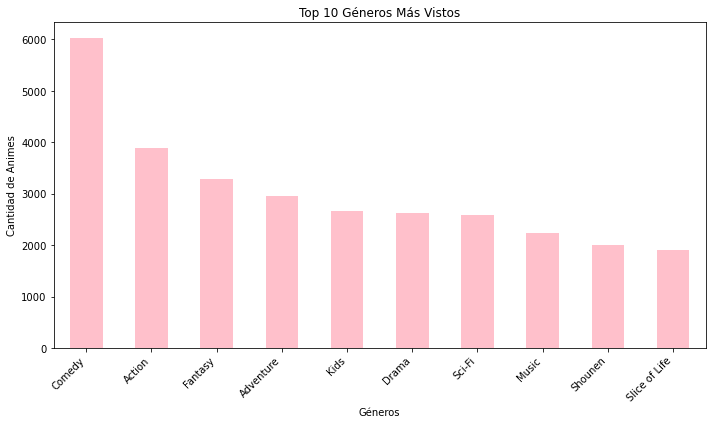

In [ ]:
genre_count = anime['Genres'].str.split(', ').explode().value_counts()

plt.figure(figsize=(10, 6))
genre_count.head(10).plot(kind='bar', color='pink')

plt.xlabel('Géneros')
plt.ylabel('Cantidad de Animes')
plt.title('Top 10 Géneros Más Vistos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
table = genre_count.head(10).reset_index()
table.columns = ['Género', 'Cantidad de Veces Visto']
table_sorted = table.sort_values(by='Cantidad de Veces Visto', ascending=False)

table_df = pd.DataFrame(table_sorted)
print(table_df)

          Género  Cantidad de Veces Visto
0         Comedy                     6029
1         Action                     3888
2        Fantasy                     3285
3      Adventure                     2957
4           Kids                     2665
5          Drama                     2619
6         Sci-Fi                     2583
7          Music                     2244
8        Shounen                     2003
9  Slice of Life                     1914


Tipos de animés más vistos

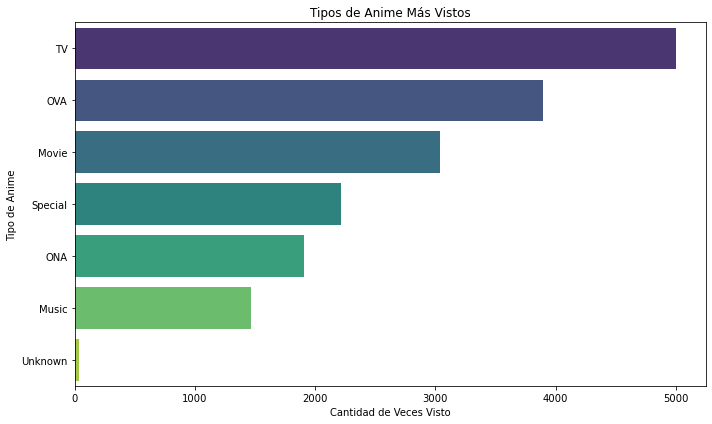

In [ ]:
type_count =anime['Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=type_count.values, y=type_count.index, palette='viridis')
plt.xlabel('Cantidad de Veces Visto')
plt.ylabel('Tipo de Anime')
plt.title('Tipos de Anime Más Vistos')
plt.tight_layout()
plt.show()

In [ ]:
type_table = pd.DataFrame(type_count).reset_index()
type_table.columns = ['Tipo de Anime', 'Cantidad de Veces Visto']
type_table_sorted = type_table.sort_values(by='Cantidad de Veces Visto', ascending=False)

df_type_table_sorted = pd.DataFrame(type_table_sorted)
print(df_type_table_sorted)

  Tipo de Anime  Cantidad de Veces Visto
0            TV                     4996
1           OVA                     3894
2         Movie                     3041
3       Special                     2218
4           ONA                     1907
5         Music                     1469
6       Unknown                       37


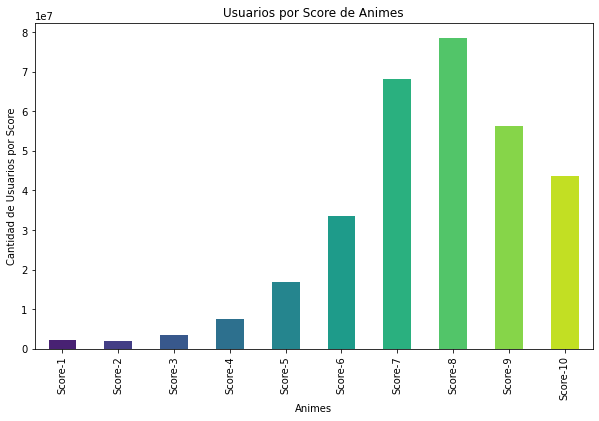

In [ ]:
score_columns = [f'Score-{i}' for i in range(1, 11)]
score_data = anime[score_columns].sum()

plt.figure(figsize=(10, 6))
score_data.plot(kind='bar', stacked=True, color=sns.color_palette('viridis', len(score_columns)))
plt.xlabel('Animes')
plt.ylabel('Cantidad de Usuarios por Score')
plt.title('Usuarios por Score de Animes')
plt.show()

Animé con mayor Score

In [ ]:
indice_mayor_score = anime['Score'].idxmax()

# Obtener los detalles del anime con el mayor puntaje en formato DataFrame
anime_mayor_score = pd.DataFrame(anime.loc[indice_mayor_score])
print("Anime con mayor puntaje:")
display(anime_mayor_score)

Anime con mayor puntaje:


,3971
MAL_ID,5114
Name,Fullmetal Alchemist: Brotherhood
Score,9.19
Genres,"Action, Military, Adventure, Comedy, Drama, Ma..."
English name,Fullmetal Alchemist:Brotherhood
Japanese name,鋼の錬金術師 FULLMETAL ALCHEMIST
Type,TV
Episodes,64
Aired,"Apr 5, 2009 to Jul 4, 2010"
Premiered,Spring 2009


In [ ]:
from IPython.display import Image

# URL de la imagen del anime con mayor puntaje
url_imagen = 'https://media.kitsu.io/anime/poster_images/3936/large.jpg'

# Mostrar la imagen en el notebook
Image(url=url_imagen)

Animé con menor Score

In [ ]:
indice_menor_score = anime['Score'].idxmin()

# Obtener los detalles del anime con el mayor puntaje en formato DataFrame
anime_menor_score = pd.DataFrame(anime.loc[indice_menor_score])
print("Anime con menor puntaje:")
display(anime_menor_score)

Anime con menor puntaje:


,2934
MAL_ID,3287
Name,Tenkuu Danzai Skelter+Heaven
Score,1.85
Genres,"Sci-Fi, Mecha"
English name,Unknown
Japanese name,天空断罪スケルターヘブン
Type,OVA
Episodes,1
Aired,"Dec 8, 2004"
Premiered,Unknown


Animé más Popular

In [ ]:
indice_mas_popular = anime['Popularity'].idxmax()

# Obtener los detalles del anime más popular en formato DataFrame
anime_mas_popular = pd.DataFrame(anime.loc[indice_mas_popular])
print("Anime más popular:")
display(anime_mas_popular)

Anime más popular:


,17560
MAL_ID,48491
Name,Yama no Susume: Next Summit
Score,NaN
Genres,"Adventure, Slice of Life, Comedy"
English name,Unknown
Japanese name,ヤマノススメ Next Summit
Type,TV
Episodes,Unknown
Aired,Unknown
Premiered,Unknown


Animé menos popular

In [ ]:
indice_menos_popular = anime['Popularity'].idxmin()

# Obtener los detalles del anime más popular en formato DataFrame
anime_menos_popular = pd.DataFrame(anime.loc[indice_menos_popular])
print("Anime menos popular:")
display(anime_menos_popular)

Anime menos popular:


,16761
MAL_ID,41750
Name,Koukaku Kidoutai: SAC_2045 2nd Season
Score,NaN
Genres,"Action, Mecha, Military, Police, Sci-Fi, Seinen"
English name,Unknown
Japanese name,攻殻機動隊 SAC_2045 2ndシーズン
Type,ONA
Episodes,12
Aired,Unknown
Premiered,Unknown


Relación entre Score y Popularidad

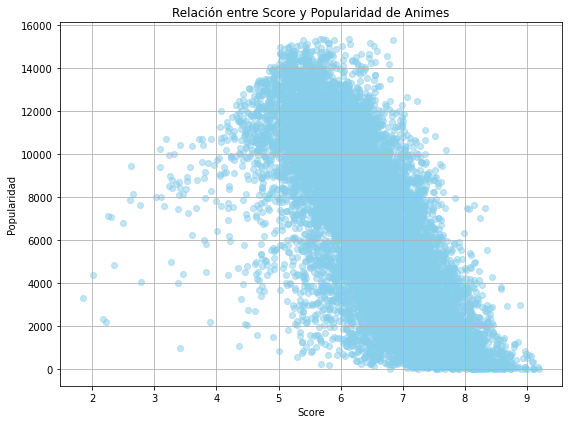

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(anime['Score'], anime['Popularity'], color='skyblue', alpha=0.5)
plt.xlabel('Score')
plt.ylabel('Popularidad')
plt.title('Relación entre Score y Popularidad de Animes')
plt.grid(True)
plt.tight_layout()
plt.show()

Relación entre ranking y popularidad

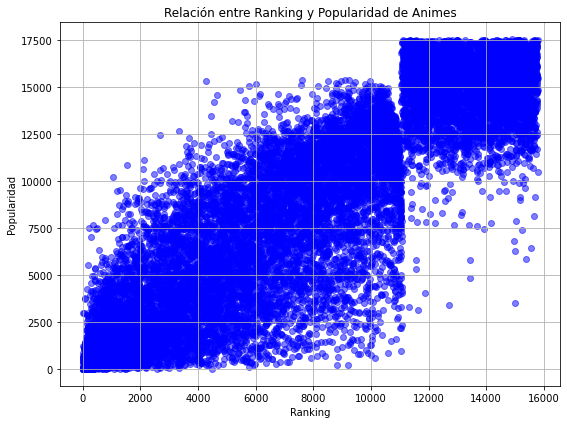

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(anime['Ranked'], anime['Popularity'], color='blue', alpha=0.5)
plt.xlabel('Ranking')
plt.ylabel('Popularidad')
plt.title('Relación entre Ranking y Popularidad de Animes')
plt.grid(True)
plt.tight_layout()
plt.show()

Relaciones entre variables

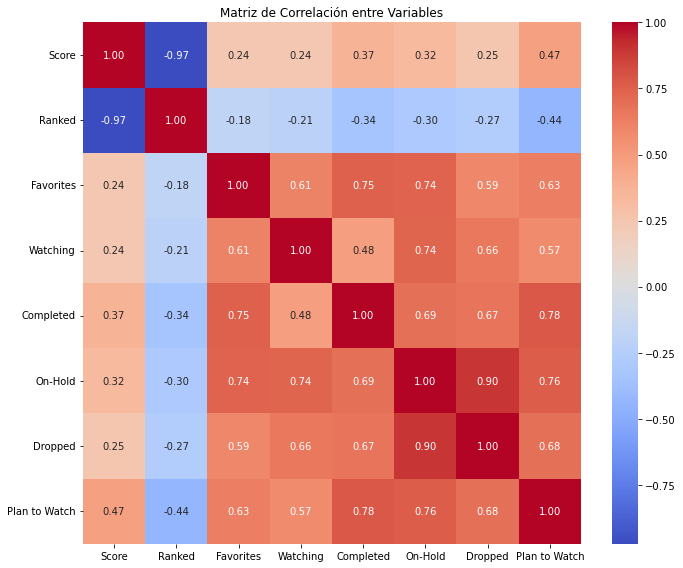

In [ ]:
correlation_matrix = anime[['Score', 'Ranked', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']].corr()

# Visualizar la matriz de correlación como un mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.tight_layout()
plt.show()

TRABAJAMOS CON DF

Cantidad de animés DF

In [ ]:
df.anime_id.nunique()

16872

Cantidad de usuarios (user_id)

In [ ]:
df.user_id.nunique()

310059

Cantidad de animés vistos por cada id

In [ ]:
animes_count = df.groupby('user_id').agg({'anime_id': 'nunique'})

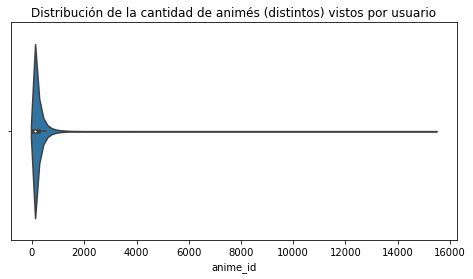

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Distribución de la cantidad de animés (distintos) vistos por usuario")
sns.violinplot(x=animes_count.anime_id)
plt.show()

In [ ]:
print(animes_count)

         anime_id
user_id          
0              35
1             103
2              51
3             315
4             118
...           ...
353400         67
353401         62
353402         19
353403         67
353404         30

[310059 rows x 1 columns]


In [ ]:
animes_count.anime_id.min()

1

In [ ]:
animes_count.anime_id.max()

15455

In [ ]:
animes_count.anime_id.mean()

185.87842313882197

In [ ]:
animes_count.anime_id.median()

113.0

In [ ]:
#Percentil 25
animes_count.anime_id.quantile(0.25)

43.0

In [ ]:
#Cantidad de usuarios que vieron más de 43 animes
animes_count[animes_count.anime_id >= 43].shape

(232551, 1)

In [ ]:
#Catidad de usuarios que vieron un solo anime
animes_count[animes_count.anime_id == 1].shape

(5952, 1)

**Vamos a filtrar el dataframe original "rating_complete" (DF), para poder trabajar mejor**

In [ ]:
user_valoraciones = df.groupby('user_id').size().reset_index(name='valoraciones')
print(user_valoraciones.shape)
user_valoraciones.head()

(310059, 2)


,user_id,valoraciones
0,0,35
1,1,103
2,2,51
3,3,315
4,4,118


In [ ]:
min_ratings = 150  # Set your desired minimum number of ratings here
users_with_min_ratings = user_valoraciones[user_valoraciones['valoraciones'] >= min_ratings]

# Get the user IDs who have made at least 'min_ratings' ratings
filtered_user_ids = users_with_min_ratings['user_id'].tolist()

# Filter the original DataFrame based on the selected user IDs
filtered_df = df[df['user_id'].isin(filtered_user_ids)]
filtered_df.head()
print(filtered_df.shape)

(46586264, 3)


In [ ]:
filtered_df.to_csv('/content/rating_complete_filtrado.csv')